In [1]:
from langchain_community.chat_models import ChatOpenAI
import json


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%cd ..
from ragchat.html_cleaner import HtmlCleaner
from ragchat.html_patterns import HtmlPatterns


/home/dp/hdd/gits/autochat


In [4]:
cleaner = HtmlCleaner(parser="inscriptis", debug=True, max_pages=None)
clean_text_dict = cleaner.get_clean_text_dict()


In [5]:
l_lens = []
c_lens = []
for fname in list(clean_text_dict.keys()):
    cleaned = clean_text_dict[fname]["cleaned"]
    c_lens.append((len(cleaned), fname))
    l_lens.append((len(cleaned.splitlines()), fname))

c_lens.sort()
l_lens.sort()


In [10]:
len(clean_text_dict)

874

In [6]:
llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0)


/home/dp/hdd/gits/autochat/env/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [7]:
result = {}
N = len(c_lens)
for idx in range(N):
    pg = c_lens[idx][1]
    text = clean_text_dict[pg]["cleaned"]
    title = clean_text_dict[pg]["title"]
    result[pg] = llm.get_num_tokens(text)
    # if idx>100:break


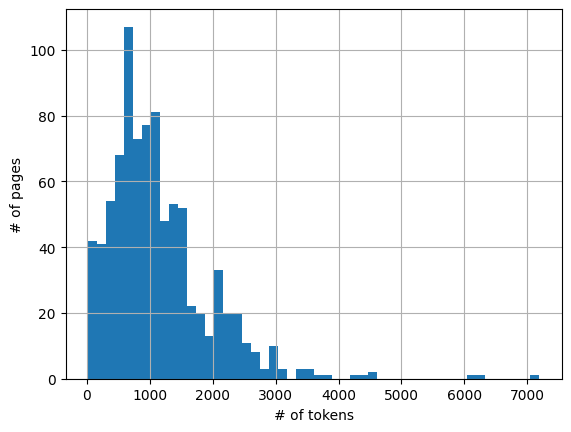

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
pd.Series(list(result.values())).hist(bins=50,ax=ax)
ax.set_xlabel("# of tokens")
ax.set_ylabel("# of pages")
# ax.set_title('page-level')
# ax.set_title('tokens per page')
fig.savefig('notebooks/images/' + 'tokens per page'.replace(' ','_') + '.png')